In [3]:
import os
import cv2
from ultralytics import YOLO

### Train YOLO

In [2]:
# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [3]:
# Train model (use data part 1-6)
result = model.train(data="D:/Coding/Projects/number-plate-recognition/code/main/config.yaml", epochs=5)  # train the model

Ultralytics YOLOv8.0.202  Python-3.9.7 torch-2.1.0+cu121 CPU (AMD Ryzen 7 3750H with Radeon Vega Mobile Gfx)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=D:/Coding/Projects/number-plate-recognition/code/main/config.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train17, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina

In [4]:
metrics = model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.0.202  Python-3.9.7 torch-2.1.0+cu121 CPU (AMD Ryzen 7 3750H with Radeon Vega Mobile Gfx)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning D:\Coding\Projects\number-plate-recognition\dataset\labels\test.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.65s/it]
                   all         15         15   0.000708        0.2    0.00064   0.000207
Speed: 10.2ms preprocess, 374.9ms inference, 0.0ms loss, 6.7ms postprocess per image
Results saved to d:\Coding\Projects\number-plate-recognition\runs\detect\train172


In [5]:
res_predict = model("D:/Coding/Projects/number-plate-recognition/data/K1_G6853EQ.jpg")  # predict on an image
path = model.export(format="onnx")  # export the model to ONNX format
# path = model.export(format="torchscript")  # export the model to ONNX format


image 1/1 D:\Coding\Projects\number-plate-recognition\data\K1_G6853EQ.jpg: 640x384 (no detections), 276.3ms
Speed: 8.2ms preprocess, 276.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)
Ultralytics YOLOv8.0.202  Python-3.9.7 torch-2.1.0+cu121 CPU (AMD Ryzen 7 3750H with Radeon Vega Mobile Gfx)

PyTorch: starting from 'd:\Coding\Projects\number-plate-recognition\runs\detect\train17\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success  2.9s, saved as 'd:\Coding\Projects\number-plate-recognition\runs\detect\train17\weights\best.onnx' (11.7 MB)

Export complete (6.3s)
Results saved to D:\Coding\Projects\number-plate-recognition\runs\detect\train17\weights
Predict:         yolo predict task=detect model=d:\Coding\Projects\number-plate-recognition\runs\detect\train17\weights\best.onnx imgsz=640  
Validate:        yolo val task=detect model=d:\Coding\Proje

In [6]:
res_predict

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'plat-nomor'}
 orig_img: array([[[244, 245, 241],
         [244, 245, 241],
         [244, 245, 241],
         ...,
         [ 35,  33,  32],
         [ 37,  35,  34],
         [ 36,  34,  33]],
 
        [[243, 244, 240],
         [243, 244, 240],
         [243, 244, 240],
         ...,
         [ 34,  32,  31],
         [ 37,  35,  34],
         [ 37,  35,  34]],
 
        [[244, 245, 241],
         [243, 244, 240],
         [243, 244, 240],
         ...,
         [ 32,  33,  31],
         [ 34,  35,  33],
         [ 34,  35,  33]],
 
        ...,
 
        [[ 67,  73,  80],
         [ 67,  73,  80],
         [ 70,  76,  83],
         ...,
         [121, 124, 128],
         [116, 119, 123],
         [105, 108, 112]],
 
        [[ 60,  66,  73],
         [ 59,  65,  72],
         [ 63,  69,  76],
         ...,
         [118, 121, 125],

In [8]:
# Run inference on 'bus.jpg' with arguments
results = model.predict("D:/Coding/Projects/number-plate-recognition/data/K1_G6853EQ.jpg", save=True, imgsz=320, conf=0.5)
# results = model('bus.jpg')

image 1/1 D:\Coding\Projects\number-plate-recognition\data\K1_G6853EQ.jpg: 320x192 (no detections), 125.9ms
Speed: 4.0ms preprocess, 125.9ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 192)
Results saved to d:\Coding\Projects\number-plate-recognition\runs\detect\train174


In [9]:
for r in results:
    print(r.boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (4000, 2252)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))


### Predict


In [1]:
import cv2
from matplotlib import pyplot as plt

In [4]:
model = YOLO("D:/Coding/Projects/number-plate-recognition/runs/detect/train17/weights/best.pt")  # load a pretrained model (recommended for training)

WARNING  'source' is missing. Using 'source=D:\Coding\Projects\number-plate-recognition\env\Lib\site-packages\ultralytics\assets'.

image 1/2 D:\Coding\Projects\number-plate-recognition\env\Lib\site-packages\ultralytics\assets\bus.jpg: 640x480 (no detections), 187.2ms
image 2/2 D:\Coding\Projects\number-plate-recognition\env\Lib\site-packages\ultralytics\assets\zidane.jpg: 384x640 (no detections), 155.0ms
Speed: 5.5ms preprocess, 171.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


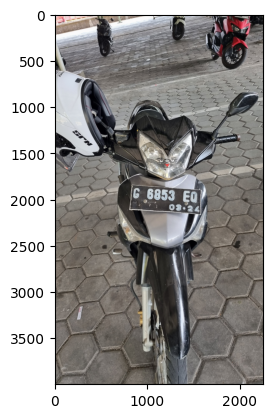

In [5]:
# Load image
path_image = "D:/Coding/Projects/number-plate-recognition/data/K1_G6853EQ.jpg"
img = cv2.imread(path_image)
img_size = img.shape[0:2]

# Predict plat
results = model()[0]

# Draw rectangle
for result in results.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = result
    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
    cv2.putText(img, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
            cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

# Show image
# cv2.namedWindow('image', cv2.WINDOW_NORMAL)  # WINDOW_NORMAL memungkinkan pengubahan ukuran jendela
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# cv2.imshow('image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()